In [69]:
# Wine Quality
# Wine has been around for a really long time, almost about 5,000 BC. Have we ever thought why it's been around for so long.
# Because it is easy to make process of simply yeast eating the natural fermentable sugars in grape juice to give
# its main product alcohol. Any fruit juice with fermentable sugars can make wine but grapes being higher on the fruit
# evolutionary ladder on fermentable sugar content we choose grapes for making wine.

# Wine market is huge in US. Accroding to the statistical atudy, the wine sale for this year is estimated to be
# 39.8 billion dollars in US and 60 billion dollars around the globe. With these huge cashflowing business,
# companies are always willing to use technologies to leviate their business to next level and to think about what is next.
# With the remarkable power of Data Science, Machine Learning and Analytics, the company can make use of their data
# to stay ahead of their competition. It helps the exective, directors, mangers to understand their business and
# change statergy, make decision using a data driven approach.

# As a sample study of what way Data Science can aid you in the field of wine business, 
# we have a small Data Science project down here. Lets just get started.

In [70]:
from sklearn import tree
import pandas as pd
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import graphviz


import matplotlib.pyplot as plt

In [71]:
wineQuality_df = pd.read_csv('winemag-data-130k-v2.csv')

In [72]:
# # Load in data
# from pyspark import SparkFiles
# url = "https://s3.amazonaws.com/zepl-trilogy-test/food.csv"
# spark.sparkContext.addFile(url)
# df = spark.read.csv(SparkFiles.get("food.csv"), sep=",", header=True)
# df.show()

In [73]:
wineQuality_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [74]:
wineQuality_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [75]:
wineQuality_df=wineQuality_df[['country','price','variety','winery','points']]
wineQuality_df.head(100)

,country,price,variety,winery,points
0,Italy,NaN,White Blend,Nicosia,87
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87
2,US,14.0,Pinot Gris,Rainstorm,87
3,US,13.0,Riesling,St. Julian,87
4,US,65.0,Pinot Noir,Sweet Cheeks,87
5,Spain,15.0,Tempranillo-Merlot,Tandem,87
6,Italy,16.0,Frappato,Terre di Giurfo,87
7,France,24.0,Gewürztraminer,Trimbach,87
8,Germany,12.0,Gewürztraminer,Heinz Eifel,87
9,France,27.0,Pinot Gris,Jean-Baptiste Adam,87


In [76]:
#  Shape is a property not a method and it counts the number of rows and columns
wineQuality_df.shape

(129971, 5)

In [77]:
# # # -----  remove all the rows with empty cells ---------
wineQuality_df.dropna(inplace=True)
#  counts the new number of rows without empty sells
wineQuality_df.shape
# wineQuality_df.head()

(120915, 5)

In [78]:
wineQuality_df.head()

,country,price,variety,winery,points
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87
2,US,14.0,Pinot Gris,Rainstorm,87
3,US,13.0,Riesling,St. Julian,87
4,US,65.0,Pinot Noir,Sweet Cheeks,87
5,Spain,15.0,Tempranillo-Merlot,Tandem,87


In [79]:
# create linear regression model using price only
#  y = mx + b where price is X and y is points
WinePrice = wineQuality_df[['price']]
data = wineQuality_df.values
X = WinePrice
y = data[:, -1]

In [80]:
# create linear regression model here

linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m and b
print(linRegModel.coef_)
print(linRegModel.intercept_)

[0.03088629]
87.32931505898736


In [81]:
#  predict/estimate the point values
y_est = linRegModel.predict(X)

In [82]:
print(y[0:10])
print(y_est[0:10])

[87 87 87 87 87 87 87 87 87 87]
[87.79260943 87.76172314 87.73083685 89.336924   87.79260943 87.82349572
 88.07058605 87.69995056 88.16324493 87.9161546 ]


In [83]:
# this model explains that price is not a good indication for a quality wine. so, we consider country.
# some countries have wines that are more expensive relative to their quality
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

0.1732200560273638
2.7686874951398965


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label-encode data set for country (to integer)
label_encoder = LabelEncoder()
label_encoder.fit(wineQuality_df.country)
country_integer = label_encoder.transform(wineQuality_df.country)

# from Peter
# wineQuality_df["encoded_countries"] = label_encoder.transform(wineQuality_df.country)
# wineQuality_df.head()

In [89]:
country_integer

array([30, 39, 39, ..., 14, 14, 14], dtype=int64)

In [90]:
# each column represents one country 
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = country_integer.reshape(len(country_integer), 1)
country_onehot = onehot_encoder.fit_transform(integer_encoded)
country_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
# Reformat data,  -1 indicates the last y value
data = wineQuality_df.values
X = data[:, 0:-1]
y = data[:, -1]

In [92]:
print(y)

[30 39 39 ... 14 14 14]


In [93]:
wineQuality_df.variety.nunique()

691

In [94]:
wineQuality_df.country.unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China'], dtype=object)

In [95]:
# create linear regression model using price and country as parameters
WinePrice = wineQuality_df[['price']]

#  adding two parameters for a better predection "price" and 'country'
X = np.concatenate((WinePrice, country_onehot), axis=1)
X

array([[15.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  1.,  0.,  0.],
       [13.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  0.],
       [21.,  0.,  0., ...,  0.,  0.,  0.]])

In [96]:
# create linear regression model here
linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m and b
print(linRegModel.coef_)
print(linRegModel.intercept_)

[ 8.20819618e-15 -2.05000000e+01 -1.95000000e+01 -1.85000000e+01
 -1.75000000e+01 -1.65000000e+01 -1.55000000e+01 -1.45000000e+01
 -1.35000000e+01 -1.25000000e+01 -1.15000000e+01 -1.05000000e+01
 -9.50000000e+00 -8.50000000e+00 -7.50000000e+00 -6.50000000e+00
 -5.50000000e+00 -4.50000000e+00 -3.50000000e+00 -2.50000000e+00
 -1.50000000e+00 -5.00000000e-01  5.00000000e-01  1.50000000e+00
  2.50000000e+00  3.50000000e+00  4.50000000e+00  5.50000000e+00
  6.50000000e+00  7.50000000e+00  8.50000000e+00  9.50000000e+00
  1.05000000e+01  1.15000000e+01  1.25000000e+01  1.35000000e+01
  1.45000000e+01  1.55000000e+01  1.65000000e+01  1.75000000e+01
  1.85000000e+01  1.95000000e+01  2.05000000e+01]
20.499999999999176


In [97]:
#  predict/estimate the point values
y_est = linRegModel.predict(X)

In [98]:
print(y[0:10])
print(y_est[0:10])

[30 39 39 39 36 21 14 16 14 39]
[30. 39. 39. 39. 36. 21. 14. 16. 14. 39.]


In [99]:
# this model explains that price is not a good indication for a quality wine. so, we consider country.
# some countries have wines that are more expensive relative to their quality
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

1.0
6.258281406591341e-13


In [100]:
# next add more attribute like year and build decision model and also wine type, variety to price and country to get a better R*2

In [101]:
wineQuality_df.head()

,country,price,variety,winery,points,encoded_countries
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87,30
2,US,14.0,Pinot Gris,Rainstorm,87,39
3,US,13.0,Riesling,St. Julian,87,39
4,US,65.0,Pinot Noir,Sweet Cheeks,87,39
5,Spain,15.0,Tempranillo-Merlot,Tandem,87,36


In [103]:
# Label-encode data set for winery (to integer)
label_encoder = LabelEncoder()
label_encoder.fit(wineQuality_df.variety)
variety_integer = label_encoder.transform(wineQuality_df.variety)

In [104]:
variety_integer

array([442, 428, 471, ..., 205, 428, 205], dtype=int64)

In [105]:
# each column represents a type of wine 
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = variety_integer.reshape(len(variety_integer), 1)
variety_onehot = onehot_encoder.fit_transform(integer_encoded)
variety_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
variety_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
WinePrice = wineQuality_df[['price']]

#  adding 3 parameters for a better predection "price", 'country' and type of the wine 'winery'.
X = np.concatenate((WinePrice, country_onehot, variety_onehot), axis=1)


In [108]:
test = pd.DataFrame(X)

In [109]:
# create linear regression model here with 3 parameters
linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m and b and notice the number of coef for country and winery.  We have price which is one variable and b is one variable
print(linRegModel.coef_)
print(linRegModel.intercept_)

[ 2.68666283e-14 -2.05000000e+01 -1.95000000e+01 -1.85000000e+01
 -1.75000000e+01 -1.65000000e+01 -1.55000000e+01 -1.45000000e+01
 -1.35000000e+01 -1.25000000e+01 -1.15000000e+01 -1.05000000e+01
 -9.50000000e+00 -8.50000000e+00 -7.50000000e+00 -6.50000000e+00
 -5.50000000e+00 -4.50000000e+00 -3.50000000e+00 -2.50000000e+00
 -1.50000000e+00 -5.00000000e-01  5.00000000e-01  1.50000000e+00
  2.50000000e+00  3.50000000e+00  4.50000000e+00  5.50000000e+00
  6.50000000e+00  7.50000000e+00  8.50000000e+00  9.50000000e+00
  1.05000000e+01  1.15000000e+01  1.25000000e+01  1.35000000e+01
  1.45000000e+01  1.55000000e+01  1.65000000e+01  1.75000000e+01
  1.85000000e+01  1.95000000e+01  2.05000000e+01  8.58418501e-12
  8.76003436e-12  9.36006828e-12  8.77999285e-12  7.22099117e-12
  8.79520068e-12  7.62439330e-12  6.93090030e-12  8.89216825e-12
  8.97103225e-12  7.65860639e-12  7.16592757e-12  8.97976138e-12
  9.32642852e-12  7.63492047e-12  7.44236617e-12  8.34133977e-12
  7.66242625e-12  6.68511

In [110]:
#  predict/estimate again the point values with 3 parameters
y_est = linRegModel.predict(X)

In [111]:
# print y value and y estimated values
print(y[0:10])
print(y_est[0:10])

[30 39 39 39 36 21 14 16 14 39]
[30. 39. 39. 39. 36. 21. 14. 16. 14. 39.]


In [112]:
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

1.0
1.2986646113724628e-12


In [37]:
# quick explanation on regression vs classification:
# Regression and classification are both related to prediction, where regression predicts a value from a continuous set,
# whereas classification predicts the 'belonging' to the class. For example, the price of a house depending on the 'size'
# (in some unit) and say 'location' of the house, can be some 'numerical value' (which can be continuous):
# this relates to regression.
# Similarly, the prediction of price can be in words, viz., 'very costly', 'costly', 'affordable', 'cheap', and 'very cheap':
# this relates to classification.

In [38]:
# Classification trees have dependent variables that are categorical and unordered.

# Regression trees have dependent variables that are continuous values or ordered whole values.

In [39]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [40]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
y_pred = regressor.predict(X_test)  

In [42]:
wineQuality_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
# wineQuality_df  

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.8294994950698837
Mean Squared Error: 5.5416107826305465
Root Mean Squared Error: 2.354062612300392
R squared: 0.3931021782209956


In [44]:
Reg = tree.DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)
Reg = Reg.fit(X_train, y_train)

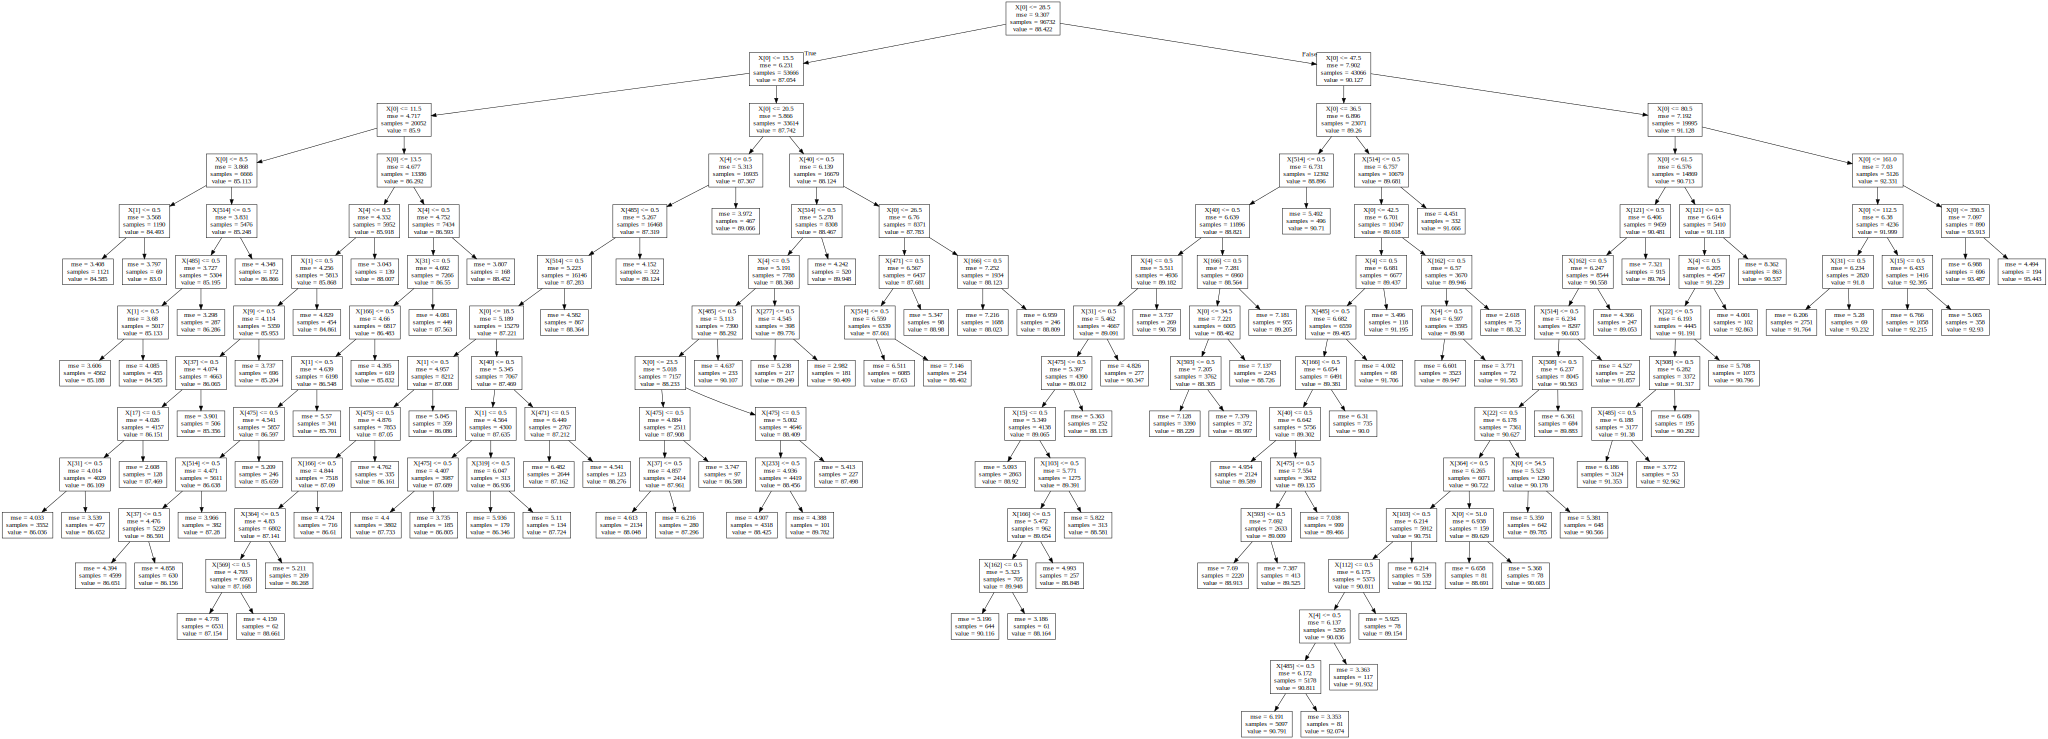

In [45]:
dot_data = tree.export_graphviz(Reg, out_file=None)

graph = graphviz.Source(dot_data) 
graph

In [46]:
# #  create decision tree regression without one hot coding
# X = wineQuality_df[['price', 'country', 'variety']]
# regressor = DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)  
# regressor.fit(X, y)  

In [48]:
data

array([[15.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [13.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  0.],
       [21.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["variety", 'country'])
data_binary_encoded.head()

Exception: Data must be 1-dimensional

In [ ]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, test_size=0.2, random_state=0) 

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R squared:', metrics.r2_score(y_test, y_pred))

In [ ]:
Reg = tree.DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)
Reg = Reg.fit(X_train, y_train)

In [ ]:
from sklearn.datasets import load_iris 
dot_data = tree.export_graphviz(Reg, out_file=None, feature_names=X_train.columns.values) 
                                

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

graph = graphviz.Source(dot_data)  
graph 

In [ ]:
dot_data = tree.export_graphviz(Reg, out_file=None, feature_names=X_train.columns.values)
graph = graphviz.Source(dot_data)
graph.write_png('tree.png')
graph

In [ ]:
# This model

In [ ]:
from sklearn.ensemble import  GradientBoostingRegressor

In [ ]:
gb_clf=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
gb_clf.fit(x_train,y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [ ]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

In [ ]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

In [ ]:
target = wineQuality_df["price"]
target_names = ["negative", "positive"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wineQuality_df, target, random_state=42)

In [ ]:
# clf = DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:

# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# from peter
df_onehot = pd.get_dummies(wineQuality_df)

In [ ]:
df_onehot.head()

In [ ]:
# making graph for decision tree regressor
from sklearn.tree import DecisionTreeRegressor

plot_data()

est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)

plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),

         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)
est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)

plt.legend(loc='upper left')

In [ ]:
# Now, let's fit a gradient boosting model to the training data and let's see how the approximation progresses as we add
# more and more trees. The scikit-learn gradient boosting estimators allow you to evaluate the prediction of a model as a
# function of the number of trees via the staged_(predict|predict_proba) methods. These return a generator that iterates
# over the predictions as you add more and more trees.

In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

In [ ]:
Before proceeding further, lets define a function which will help us create GBM models and perform cross-validation.

In [ ]:
# change colors in decision Tree Regression

import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

In [ ]:
#  Or use this code for using two colors
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')